In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
usuarios = pd.read_csv('curtidas_new_york.csv', encoding = 'ISO-8859-1')

In [3]:
usuarios.tail()

,id,firstName,gender,avenue_id,avenue_name,avenue_categories,avenue_lat,avenue_lng
55686,12008009,Mert,male,3fd66200f964a520b6e71ee3,Carnegie Hall,Concert Hall,40.765125,-73.979919
55687,46043188,Christopher,male,3fd66200f964a520b6e71ee3,Carnegie Hall,Concert Hall,40.765125,-73.979919
55688,66093767,Sun-Young,female,3fd66200f964a520b6e71ee3,Carnegie Hall,Concert Hall,40.765125,-73.979919
55689,1876689,Virginia,female,3fd66200f964a520b6e71ee3,Carnegie Hall,Concert Hall,40.765125,-73.979919
55690,53586928,Debora,female,3fd66200f964a520b6e71ee3,Carnegie Hall,Concert Hall,40.765125,-73.979919


In [36]:
vc = usuarios['id'].value_counts()

#### Filtra pessoas com mais de 10 likes na base de dados

In [96]:
filter = vc[vc > 10].index.tolist()

In [97]:
unique_users = usuarios[usuarios['id'].isin(filter)][['id', 'firstName', 'gender']].drop_duplicates()

In [98]:
len(unique_users)

297

In [99]:
base = usuarios[usuarios['id'].isin(filter)]

In [100]:
G = nx.Graph()

In [101]:
for u in unique_users.iterrows():
    G.add_node(u[1]['id'], name=u[1]['firstName'], gender=u[1]['gender'])

In [102]:
for u in unique_users.iterrows():
    id = u[1]['id']
    local_id = base[base['id'] == id]
    for local in local_id.iterrows():
        local_id = local[1]['avenue_id']
        for p in base[base['avenue_id'] == local_id].iterrows():
            if p[1]['id'] != id:
                if G.has_edge(id, p[1]['id']):
                    for id1,id2,data in G.edges(data=True):
                        if (id == id1 or id == id2) and (p[1]['id'] == id1 or p[1]['id'] == id2):
                            data['weight'] = data['weight'] + 1
                            break
                else:
                    G.add_edge(id, p[1]['id'], weight=1)

In [103]:
nx.write_gml(G, 'graph.gml')

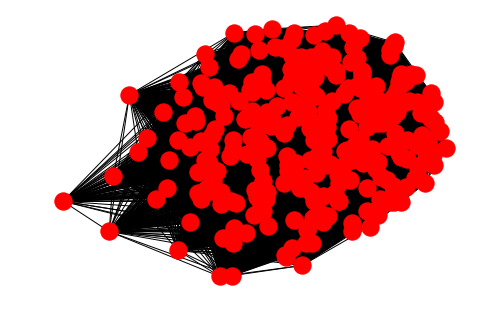

In [104]:
nx.draw(G)

In [106]:
nx.degree_centrality(G)

{91473498: 0.9222972972972974,
 43792057: 0.9628378378378379,
 9427412: 0.9493243243243243,
 1181025: 0.9628378378378379,
 9853948: 0.8952702702702703,
 128011: 0.9425675675675677,
 34236821: 0.9527027027027027,
 4559286: 0.945945945945946,
 144125971: 0.9831081081081081,
 61511405: 0.9358108108108109,
 1104339: 0.9864864864864865,
 335448286: 0.9831081081081081,
 94739204: 0.9527027027027027,
 155138853: 0.9695945945945946,
 480906225: 0.9628378378378379,
 407688022: 0.9831081081081081,
 70233253: 0.9425675675675677,
 122363534: 0.9864864864864865,
 69663140: 0.9898648648648649,
 57896336: 0.9831081081081081,
 127715551: 0.8716216216216217,
 455921269: 0.9155405405405406,
 6136256: 0.8783783783783784,
 11247: 0.9560810810810811,
 14093787: 0.9493243243243243,
 82858053: 0.8614864864864865,
 197797827: 0.9797297297297298,
 190216697: 0.9425675675675677,
 12431394: 0.8614864864864865,
 38694390: 0.9831081081081081,
 394064620: 0.918918918918919,
 5359589: 0.9628378378378379,
 88389605: 

In [108]:
nx.average_clustering(G, weight='weight')

0.11816740703471457

In [109]:
nx.average_clustering(G)

0.9302151754731397

In [110]:
nx.betweenness_centrality(G)

{91473498: 0.00022762639251690993,
 43792057: 0.0003945465484030223,
 9427412: 0.0003252181495013355,
 1181025: 0.0003817429800921429,
 9853948: 0.00028431727775365907,
 128011: 0.00037825059879315195,
 34236821: 0.00025821266262130864,
 4559286: 0.0002741378525714381,
 144125971: 0.0003469594860670851,
 61511405: 0.00023634051967291907,
 1104339: 0.000414656504069537,
 335448286: 0.0003452532018936388,
 94739204: 0.0002751615179987764,
 155138853: 0.0003030711194442726,
 480906225: 0.00029352425547118645,
 407688022: 0.0003180704528122101,
 70233253: 0.0002925076621679382,
 122363534: 0.0003733251335321715,
 69663140: 0.00039703620600075993,
 57896336: 0.00034151027908601466,
 127715551: 0.0001575835325168854,
 455921269: 0.0002743955766347254,
 6136256: 0.00018092917639962568,
 11247: 0.0002628606075429543,
 14093787: 0.00031080297164707356,
 82858053: 0.0001891896818307456,
 197797827: 0.0004156653780708989,
 190216697: 0.00027180281696613474,
 12431394: 0.00022902216027893555,
 386

In [118]:
pos = nx.spring_layout(G)
betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
node_color = [200000 * G.degree(v) for v in G]
node_size = [v * 100000 for v in betCent.values()]

(-1.1017164014325864,
 0.8781061147943287,
 -0.8198137916886133,
 0.8743480708576409)

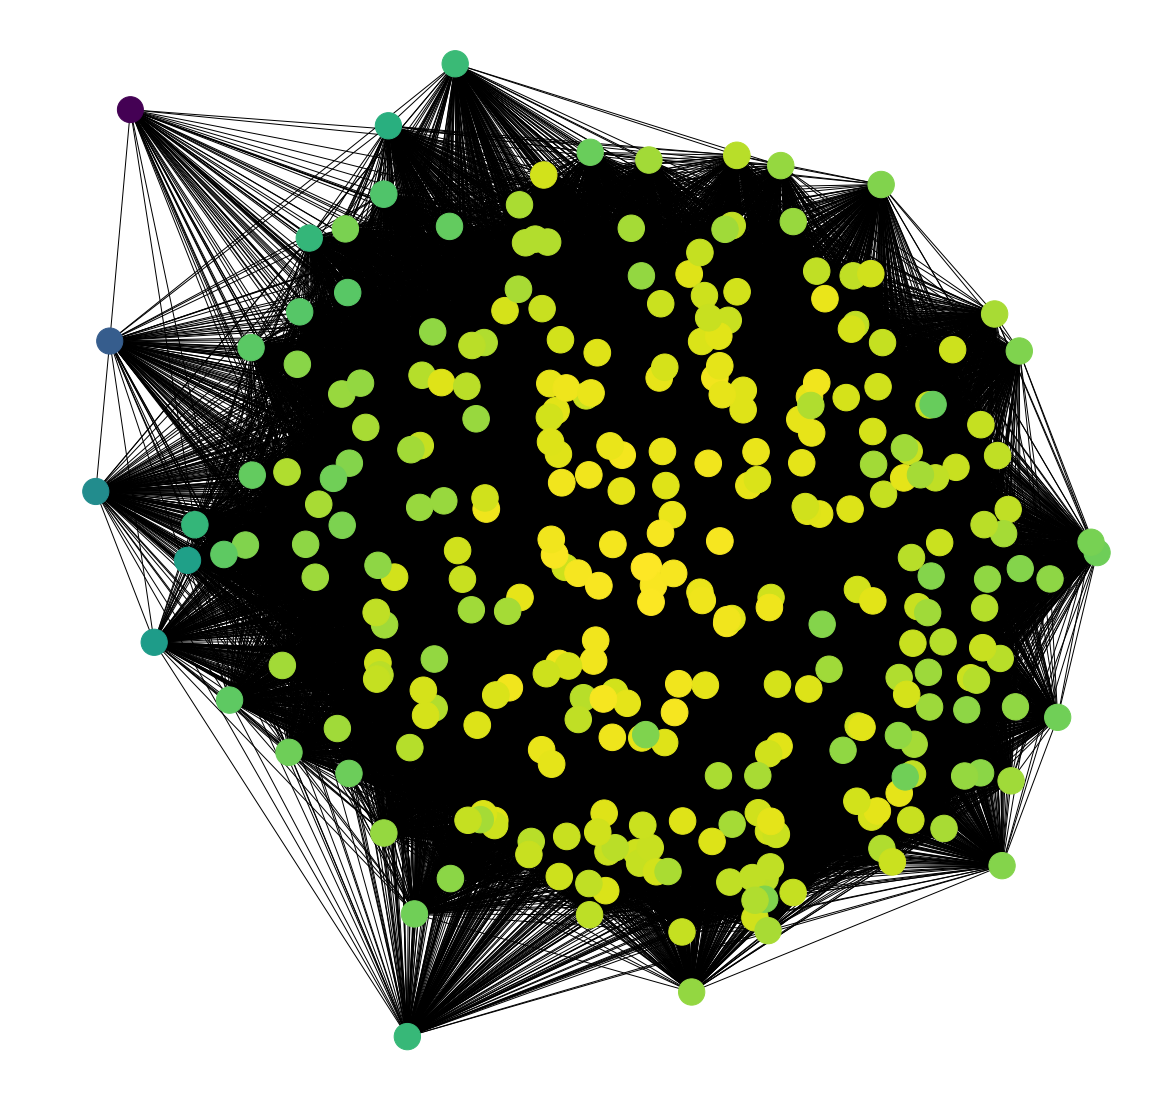

In [119]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')